In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use("fivethirtyeight")
import warnings
warnings.filterwarnings("ignore")

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
fashion_datset=keras.datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels)=fashion_datset.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


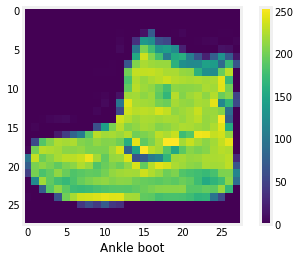

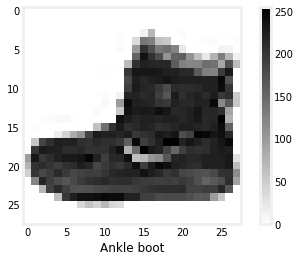

In [5]:
#ankle boot in color photo
plt.imshow(train_images[0])
plt.colorbar()
plt.xlabel(class_names[train_labels[0]])
plt.grid(False)
plt.show()
#ankle boot in black and white photo
plt.imshow(train_images[0],cmap=plt.cm.binary)
plt.xlabel(class_names[train_labels[0]])
plt.colorbar()
plt.grid(False)
plt.show()

In [6]:
train_images=train_images/255.0
test_images=test_images/255.0

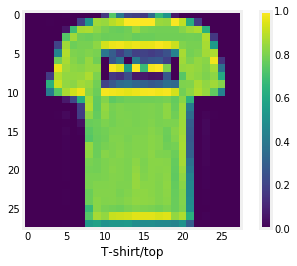

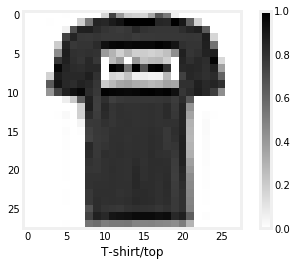

In [7]:
#ankle boot in color photo
plt.imshow(train_images[1])
plt.colorbar()
plt.xlabel(class_names[train_labels[1]])
plt.grid(False)
plt.show()
#ankle boot in black and white photo
plt.imshow(train_images[1],cmap=plt.cm.binary)
plt.xlabel(class_names[train_labels[1]])
plt.colorbar()
plt.grid(False)
plt.show()

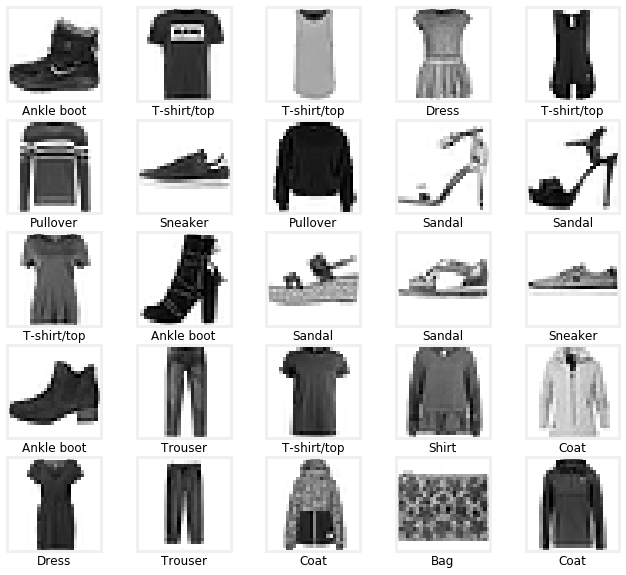

In [8]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.grid(False)
    plt.gca().set_xticks([])
    plt.gca().set_yticks([])
    plt.imshow(train_images[i],cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [9]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


# logits
### The vector of raw (non-normalized) predictions that a classification model generates, which is ordinarily then passed to a normalization function. If the model is solving a multi-class classification problem, logits typically become an input to the softmax function. The softmax function then generates a vector of (normalized) probabilities with one value for each possible class.

### In addition, logits sometimes refer to the element-wise inverse of the sigmoid function. For more information, see tf.nn.sigmoid_cross_entropy_with_logits.

In [11]:
model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

In [12]:
model.fit(train_images,train_labels,epochs=25,
         batch_size=32,validation_data=(test_images,test_labels))

Epoch 1/25
1875/1875 [==============================] - 2s 1ms/step - loss: 1.7153 - accuracy: 0.7502 - val_loss: 1.6850 - val_accuracy: 0.7777
Epoch 2/25
1875/1875 [==============================] - 2s 1ms/step - loss: 1.6768 - accuracy: 0.7842 - val_loss: 1.6799 - val_accuracy: 0.7802
Epoch 3/25
1875/1875 [==============================] - 2s 1ms/step - loss: 1.6690 - accuracy: 0.7918 - val_loss: 1.6864 - val_accuracy: 0.7742
Epoch 4/25
1875/1875 [==============================] - 2s 1ms/step - loss: 1.6629 - accuracy: 0.7980 - val_loss: 1.6705 - val_accuracy: 0.7899
Epoch 5/25
1875/1875 [==============================] - 2s 1ms/step - loss: 1.6595 - accuracy: 0.8011 - val_loss: 1.6607 - val_accuracy: 0.8002
Epoch 6/25
1875/1875 [==============================] - 2s 1ms/step - loss: 1.6560 - accuracy: 0.8046 - val_loss: 1.6819 - val_accuracy: 0.7786
Epoch 7/25
1875/1875 [==============================] - 2s 1ms/step - loss: 1.6521 - accuracy: 0.8085 - val_loss: 1.6593 - val_accuracy:

In [13]:
loss=pd.DataFrame(model.history.history)
loss.head()

,loss,accuracy,val_loss,val_accuracy
0,1.715302,0.750183,1.684989,0.7777
1,1.676814,0.784233,1.679863,0.7802
2,1.669044,0.791750,1.686367,0.7742
3,1.662949,0.798000,1.670527,0.7899
4,1.659474,0.801067,1.660679,0.8002


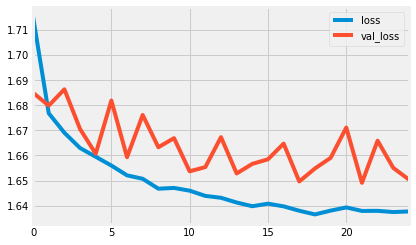

In [14]:
loss[["loss","val_loss"]].plot()

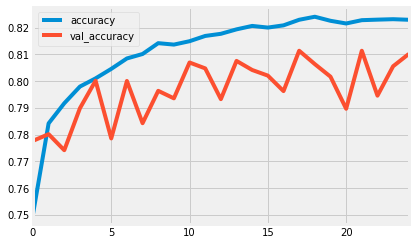

In [15]:
loss[["accuracy","val_accuracy"]].plot()

In [16]:
y_pred=np.argmax(model.predict(test_images),axis=-1)

In [17]:
y_prob=model.predict(test_images)
y_prob

array([[3.5737383e-24, 9.6695268e-20, 3.0775108e-18, ..., 2.4845783e-11,
        1.0810442e-21, 1.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [2.3847804e-36, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.9406360e-18, 4.8979815e-19, 1.9424806e-10, ..., 1.0926603e-15,
        2.6052438e-13, 3.8893274e-34]], dtype=float32)

In [18]:
from sklearn.metrics import confusion_matrix,classification_report

In [19]:
# analysing the results
print(confusion_matrix(test_labels,y_pred))
print(classification_report(test_labels,y_pred))

[[852   0  27  25   0   1  85   0  10   0]
 [  8 952   9  26   0   0   3   0   2   0]
 [ 14   0 919  17   0   0  48   0   2   0]
 [ 29   3  25 917   0   0  22   0   4   0]
 [  0   0 600 158   0   1 235   0   6   0]
 [  0   0   0   2   0 950   0  30   5  13]
 [155   0 166  39   0   0 625   0  15   0]
 [  0   0   0   0   0   9   0 970   0  21]
 [  2   0   9   5   0   2   4   4 974   0]
 [  0   0   0   0   0   7   1  49   0 943]]
              precision    recall  f1-score   support

           0       0.80      0.85      0.83      1000
           1       1.00      0.95      0.97      1000
           2       0.52      0.92      0.67      1000
           3       0.77      0.92      0.84      1000
           4       0.00      0.00      0.00      1000
           5       0.98      0.95      0.96      1000
           6       0.61      0.62      0.62      1000
           7       0.92      0.97      0.94      1000
           8       0.96      0.97      0.97      1000
           9       0.97     

In [20]:
loss,accuracy=model.evaluate(test_images,test_labels,verbose=1)
print(f"loss is {loss}")
print(f"accuracy is {accuracy*100}%")

313/313 [==============================] - 0s 736us/step - loss: 1.6504 - accuracy: 0.8102
loss is 1.650387167930603
accuracy is 81.01999759674072%


In [21]:
wrong_predictions=[]
for i in range(10000):
    if(test_labels[i]!=y_pred[i]):
        wrong_predictions.append(i)
wrong_predictions[:10]

[6, 10, 14, 17, 25, 40, 42, 49, 50, 51]

In [22]:
def plottingphoto(number):
    yp=y_pred[number]
    yt=test_labels[number]
    if yp==yt:
        color="blue"
    else:
        color="red"
    plt.imshow(test_images[number])
    plt.grid(False)
    plt.gca().set_xticks([])
    plt.gca().set_yticks([])
    plt.xlabel(class_names[yp],color=color)

In [23]:
def plottingbargraph(number):
    yp=y_pred[number]
    yt=test_labels[number]
    plt.xticks(range(10))
    plt.grid(False)
    barplot=plt.bar(range(10),y_prob[number],color="blue")
    if yp==yt:
        barplot[yp].set_color("blue")
    else:
        barplot[yp].set_color("red")

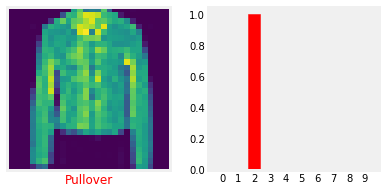

In [24]:
image_no=10
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plottingphoto(image_no)
plt.subplot(1,2,2)
plottingbargraph(image_no)
plt.show()

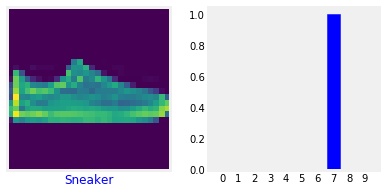

In [25]:
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plottingphoto(12)
plt.subplot(1,2,2)
plottingbargraph(12)
plt.show()

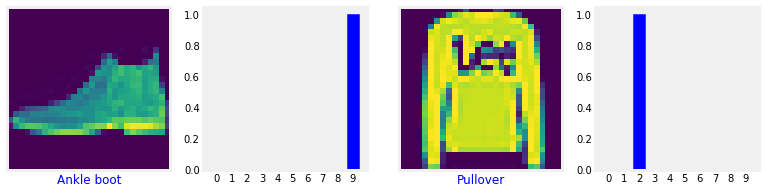

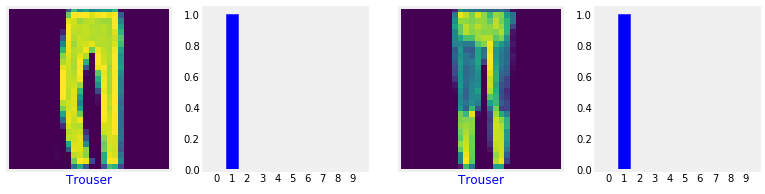

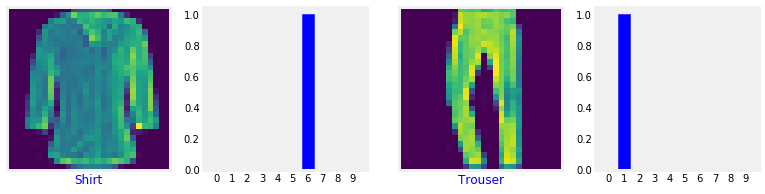

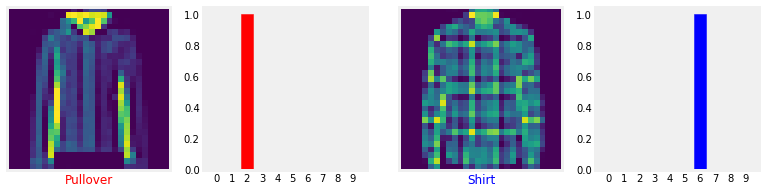

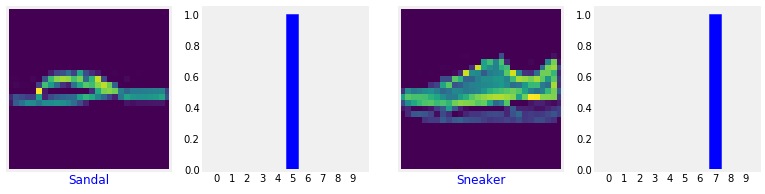

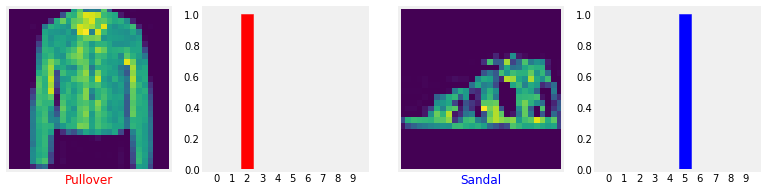

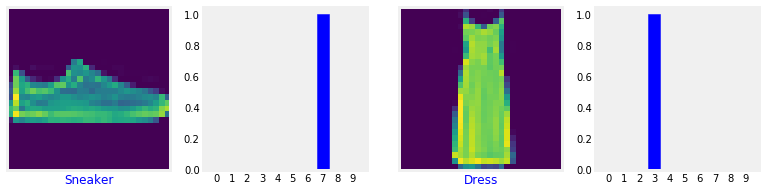

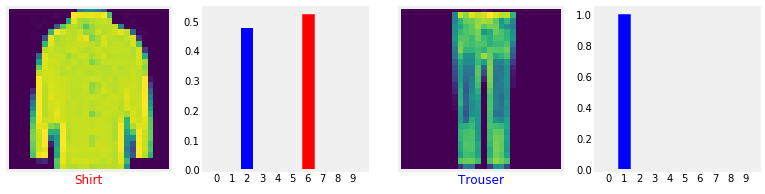

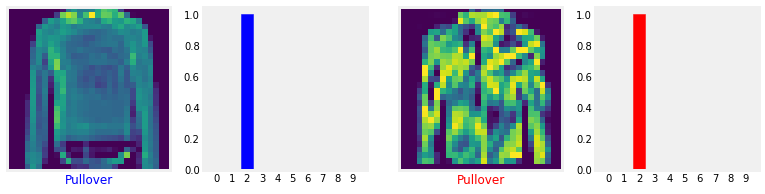

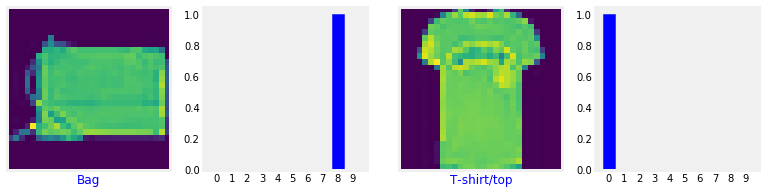

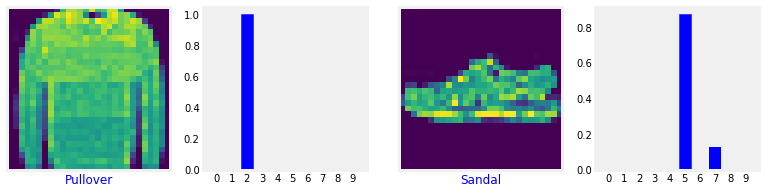

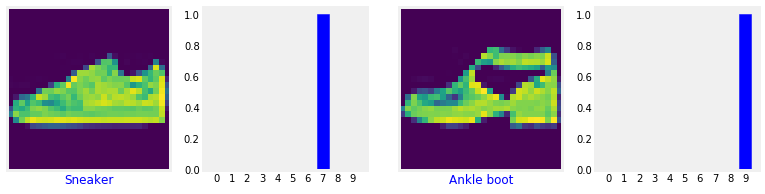

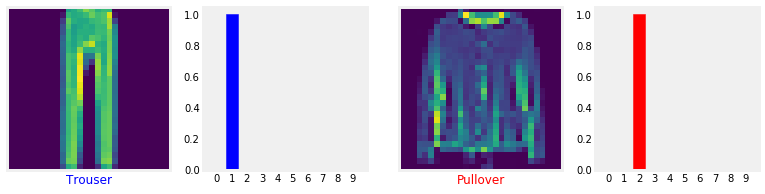

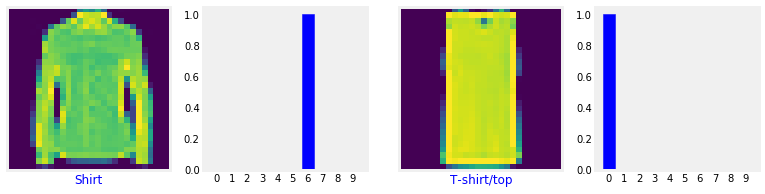

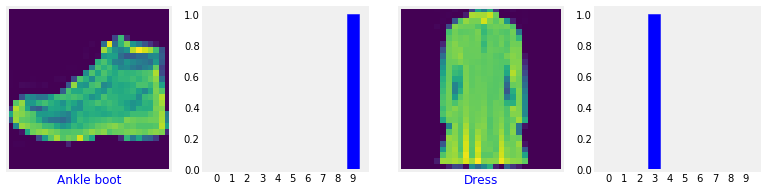

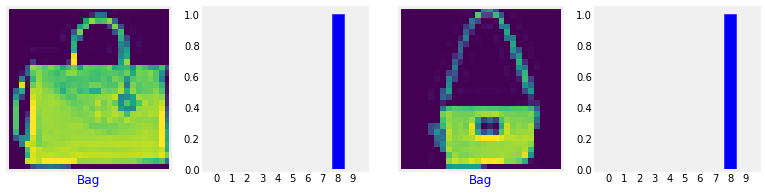

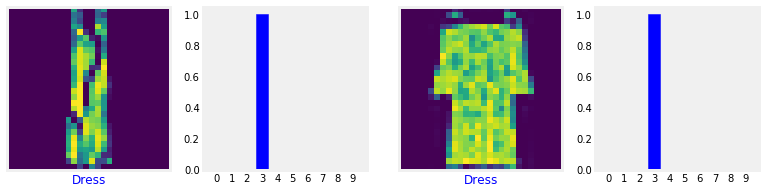

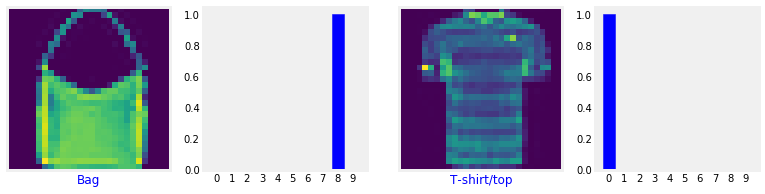

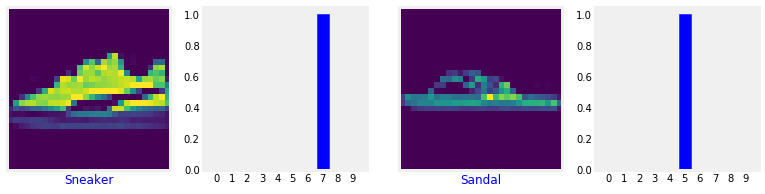

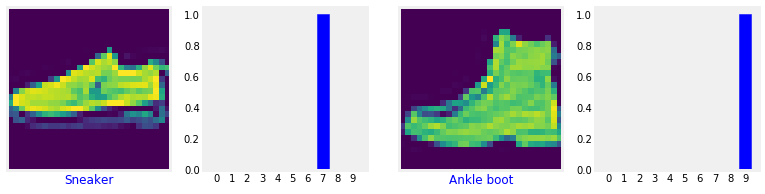

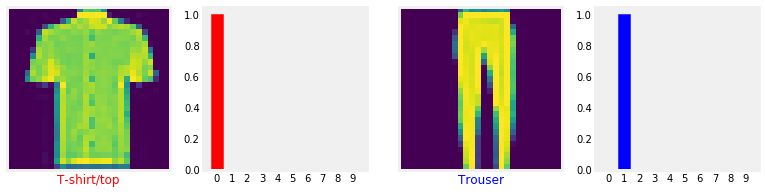

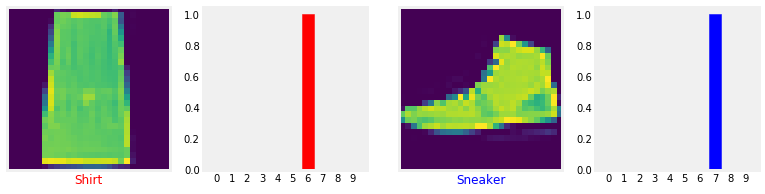

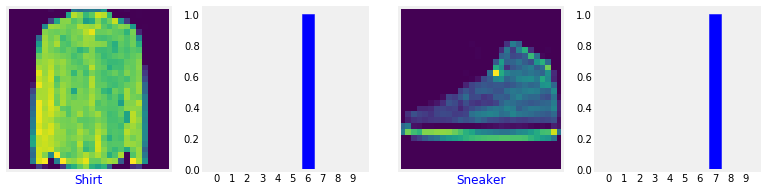

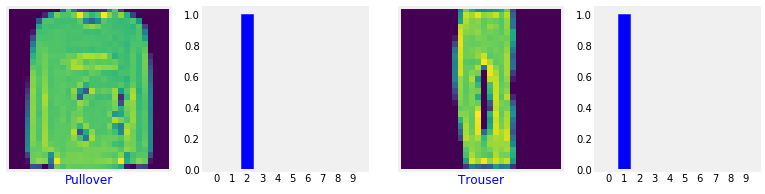

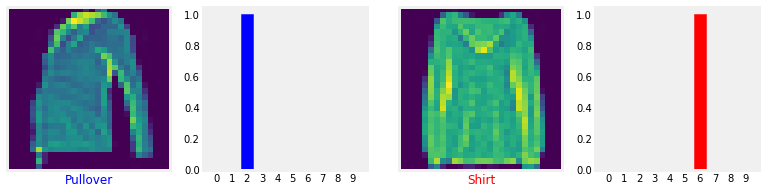

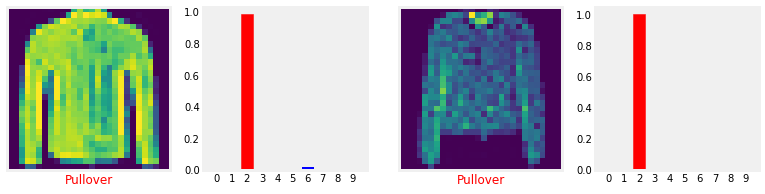

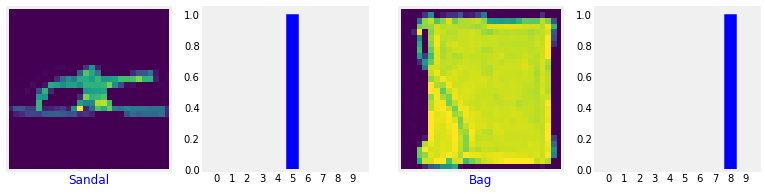

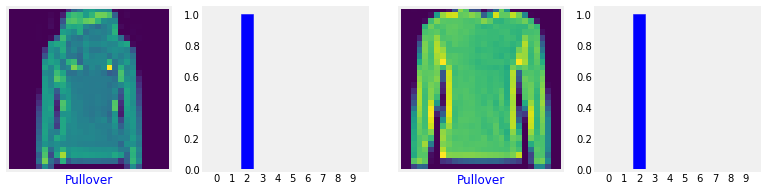

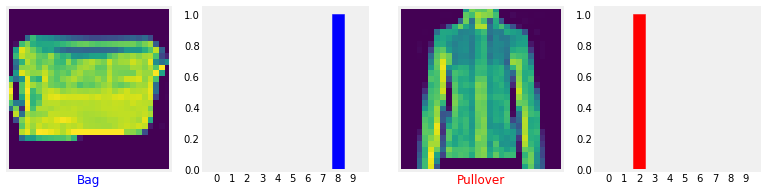

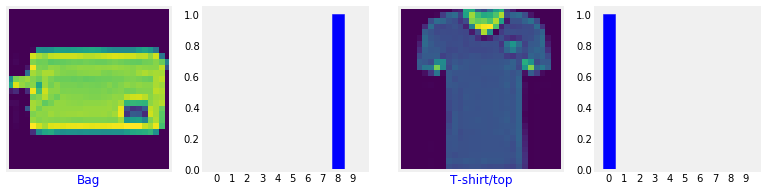

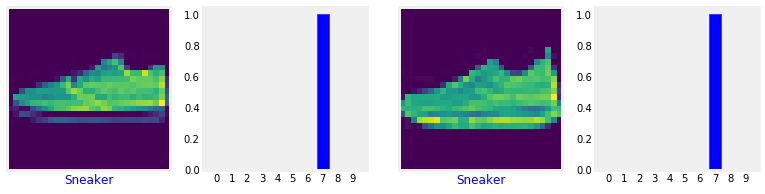

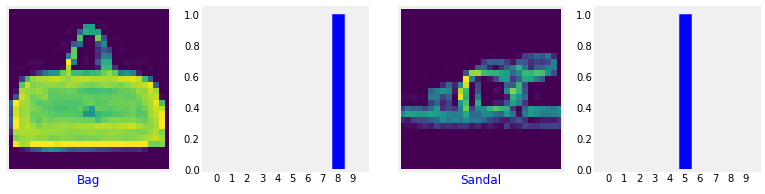

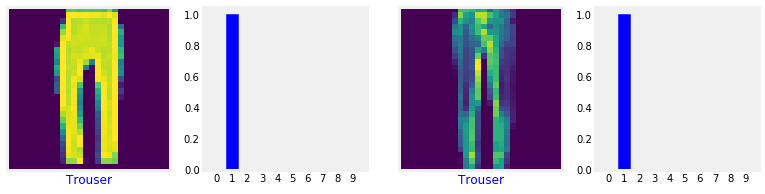

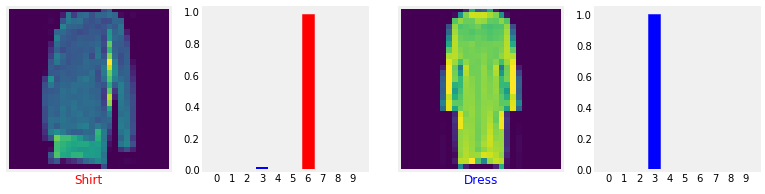

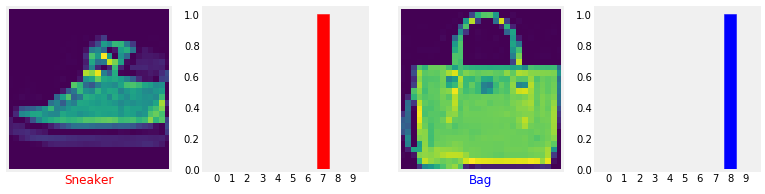

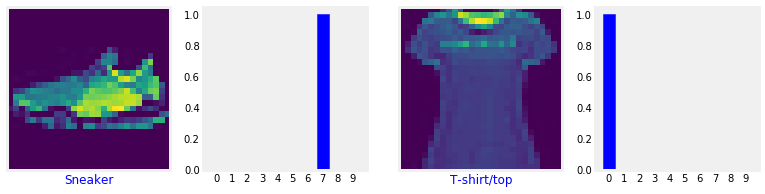

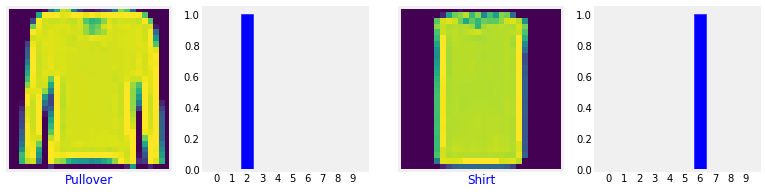

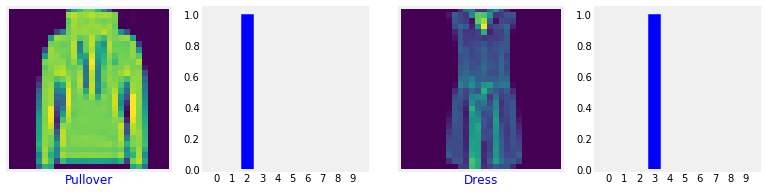

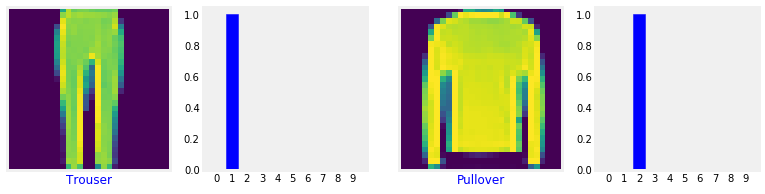

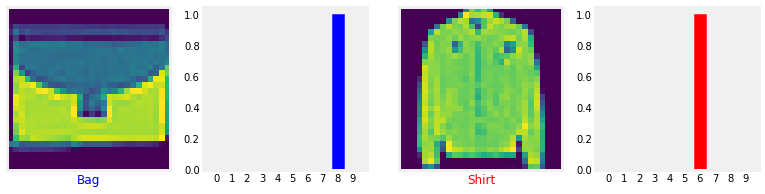

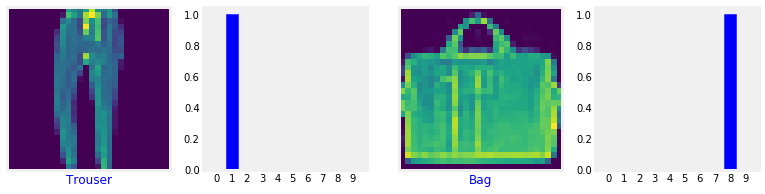

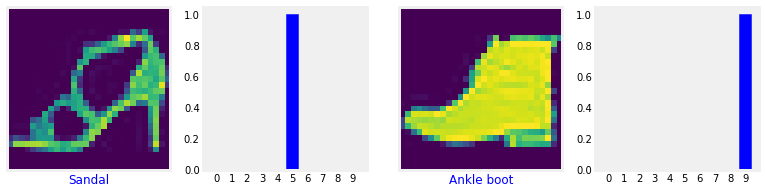

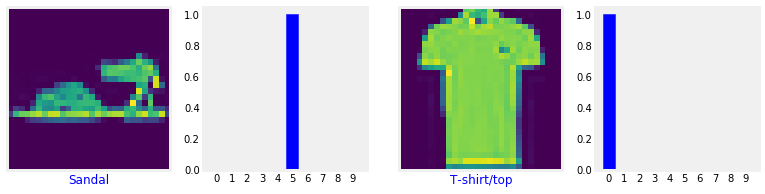

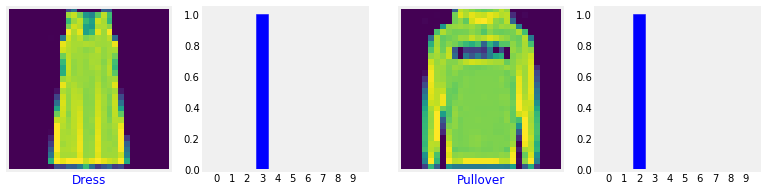

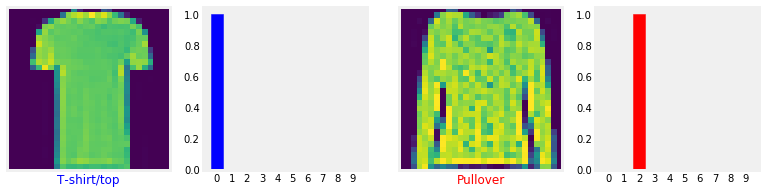

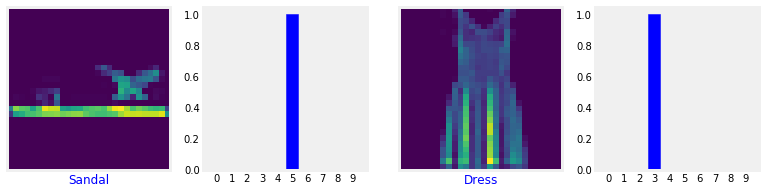

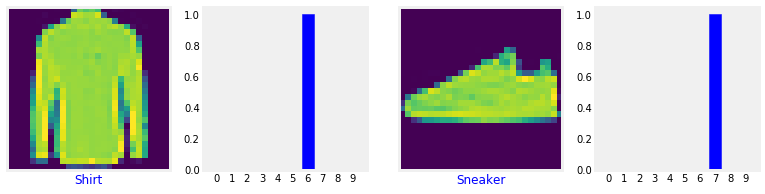

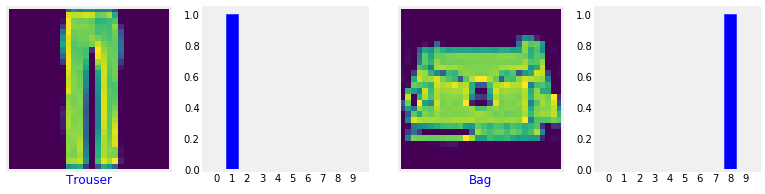

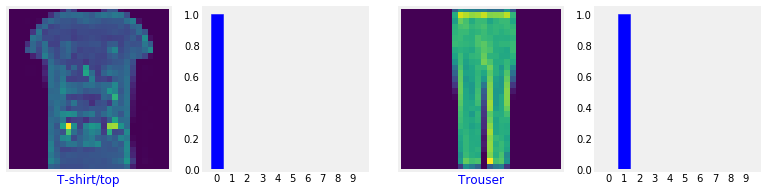

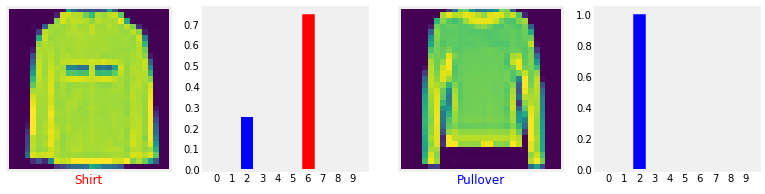

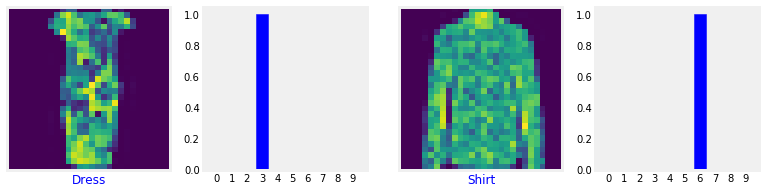

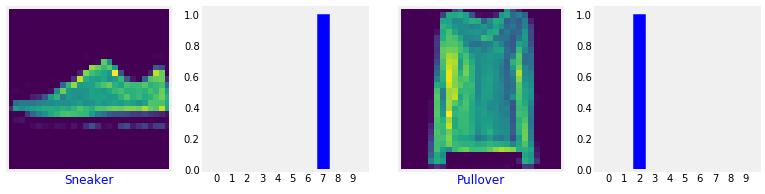

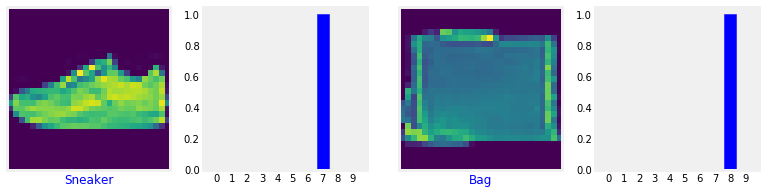

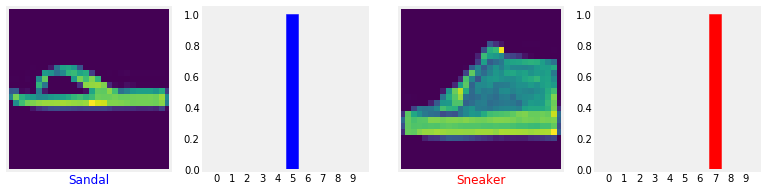

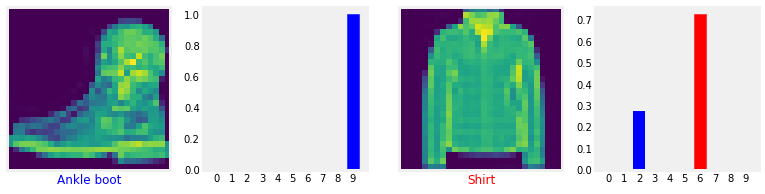

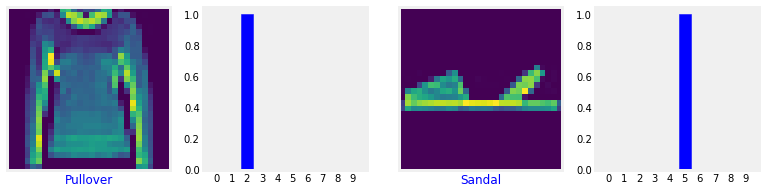

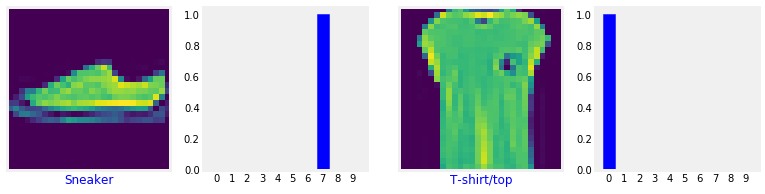

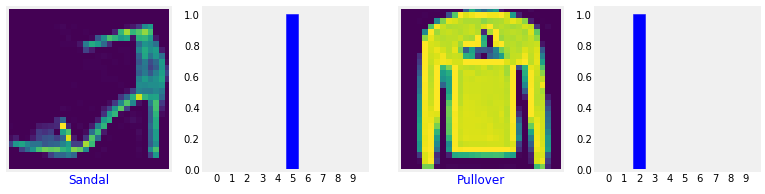

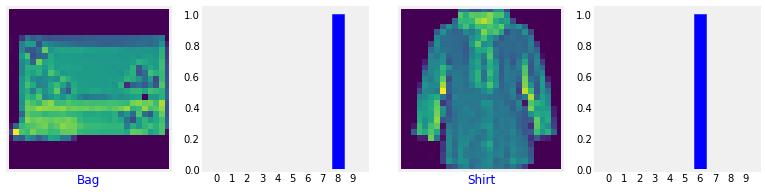

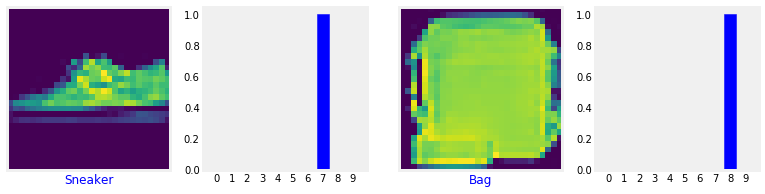

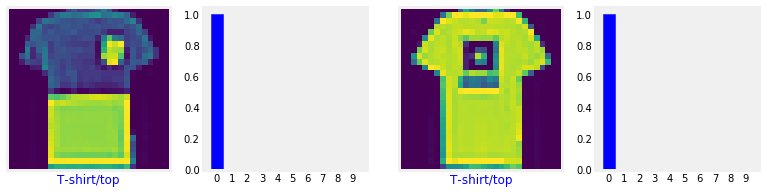

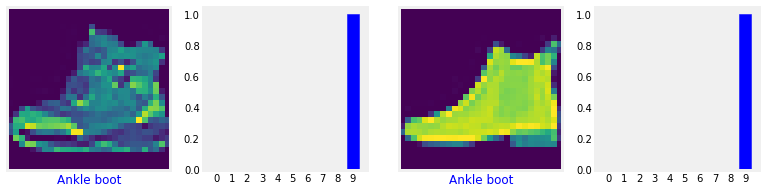

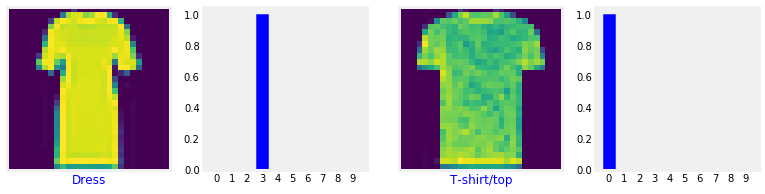

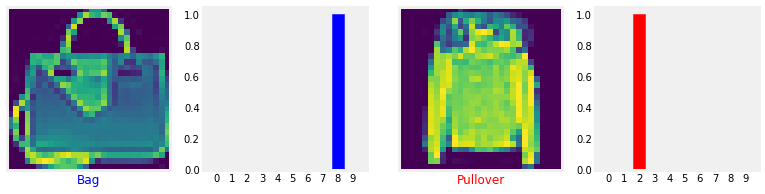

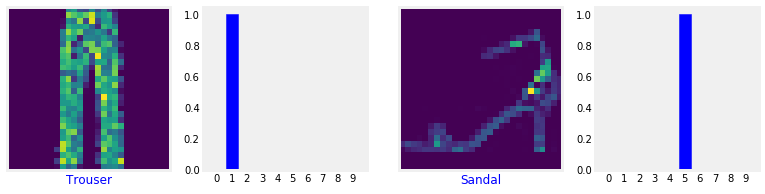

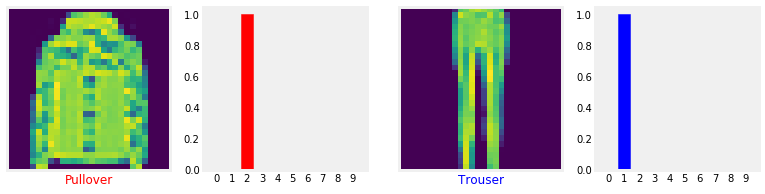

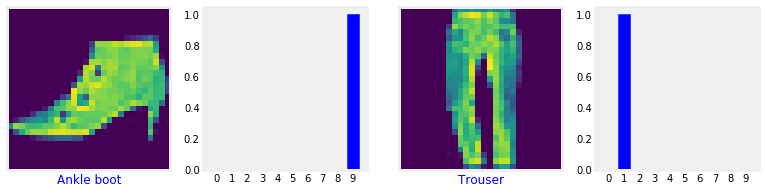

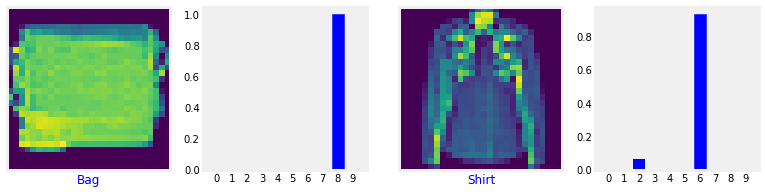

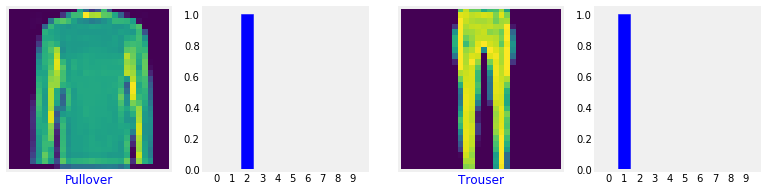

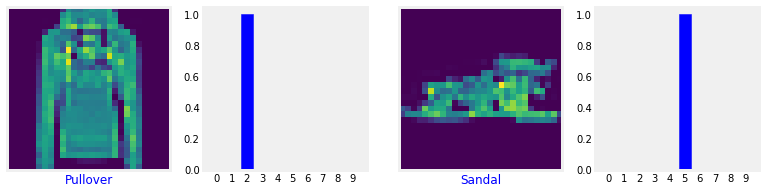

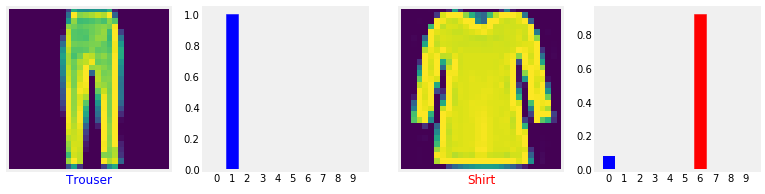

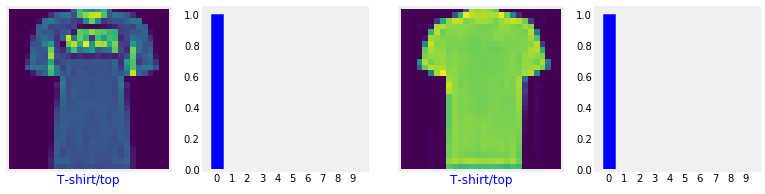

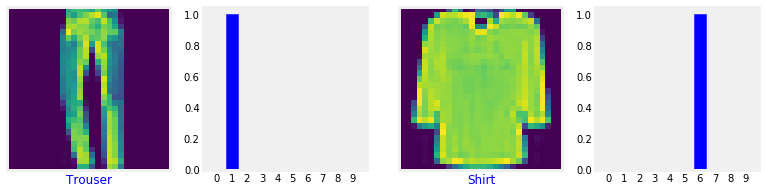

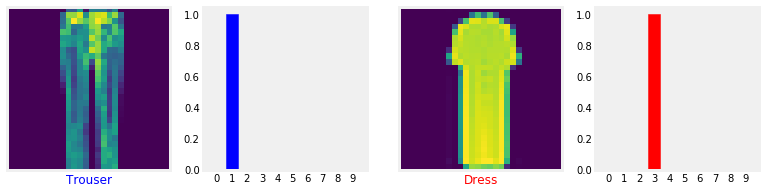

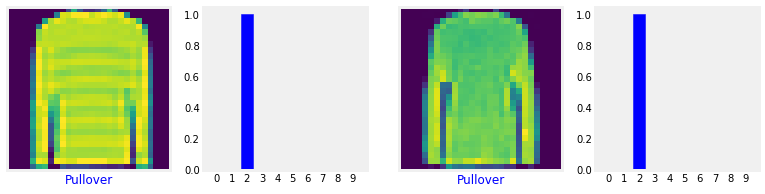

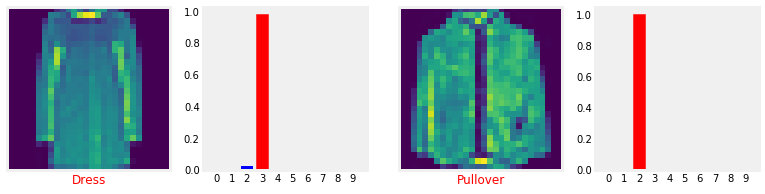

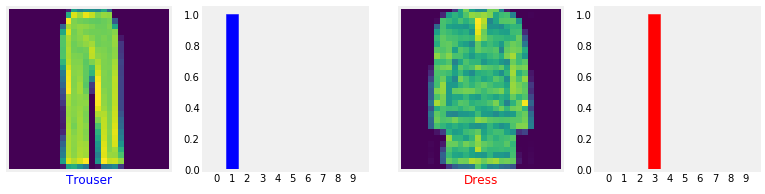

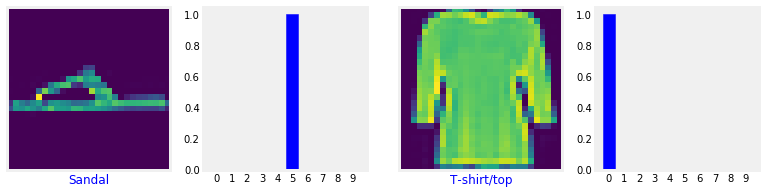

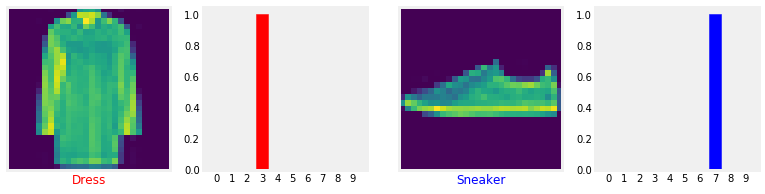

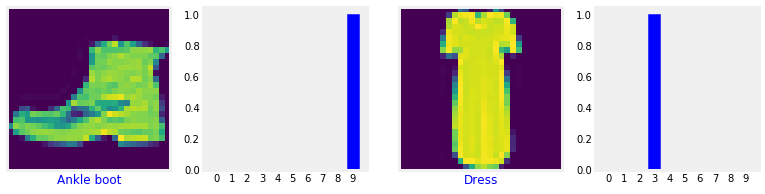

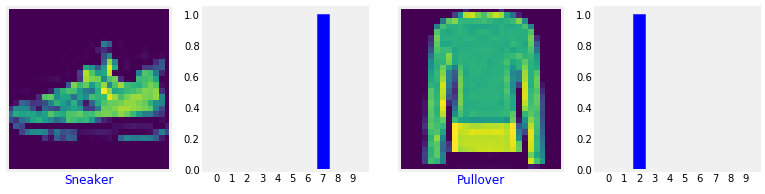

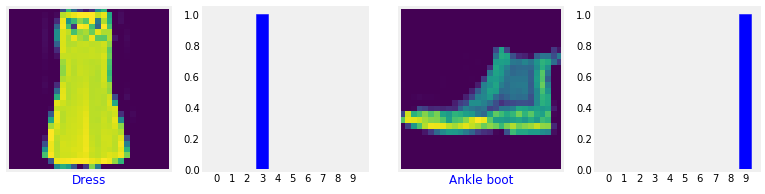

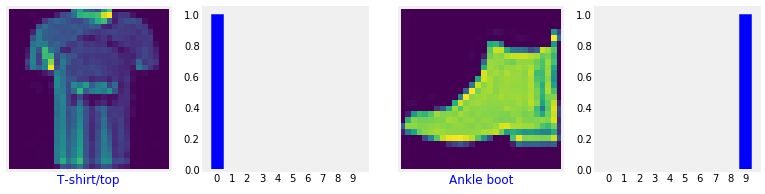

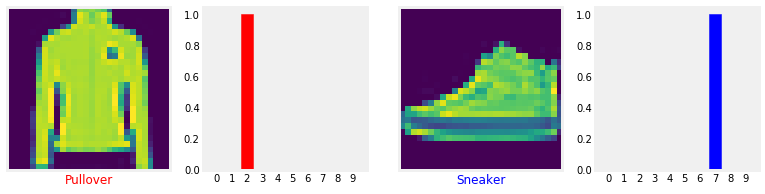

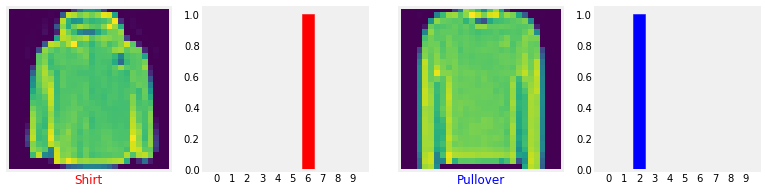

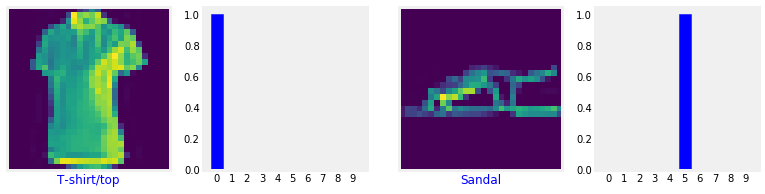

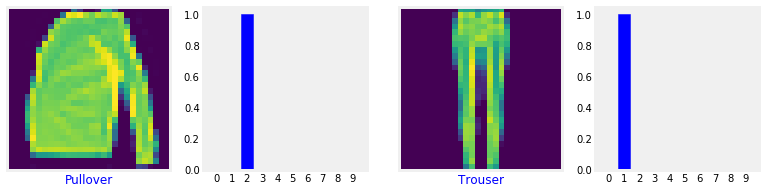

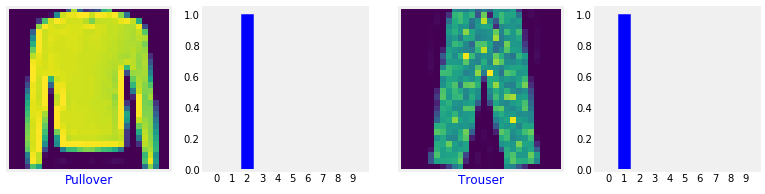

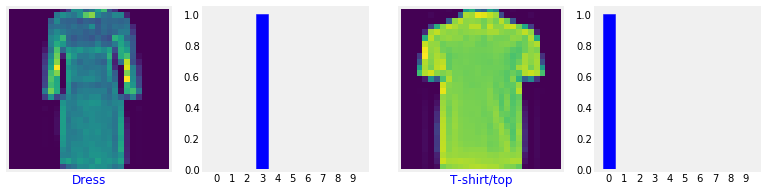

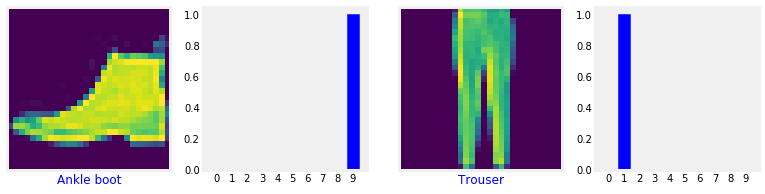

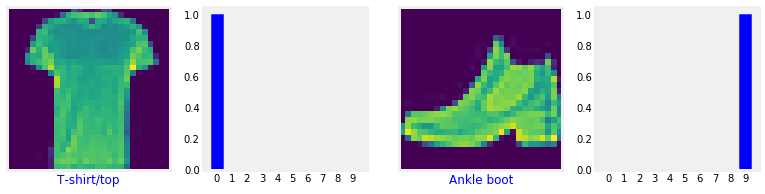

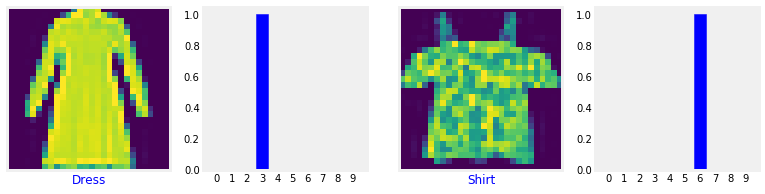

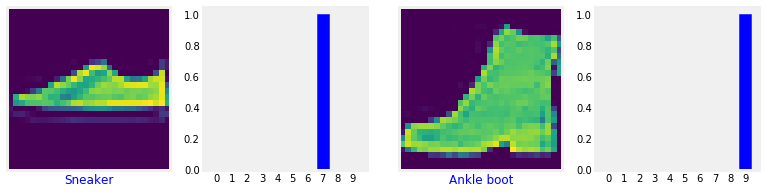

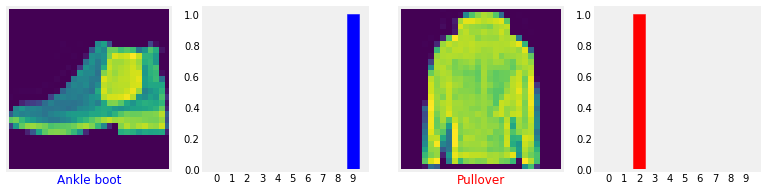

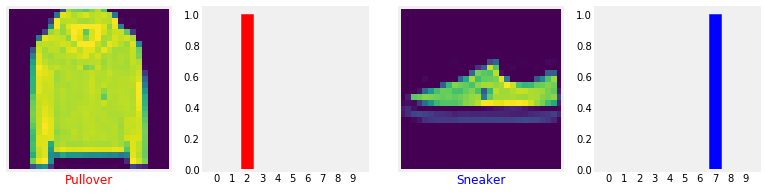

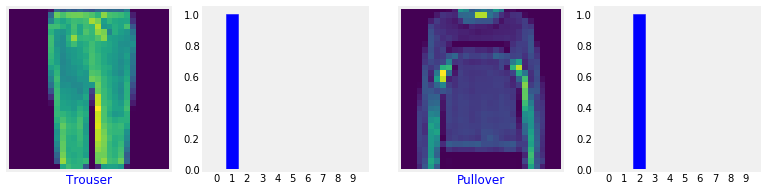

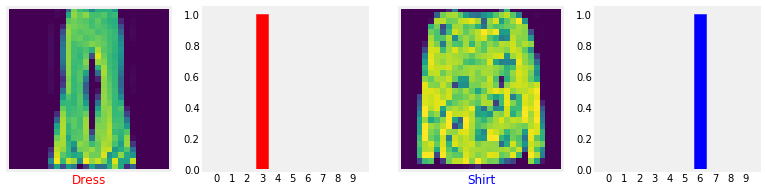

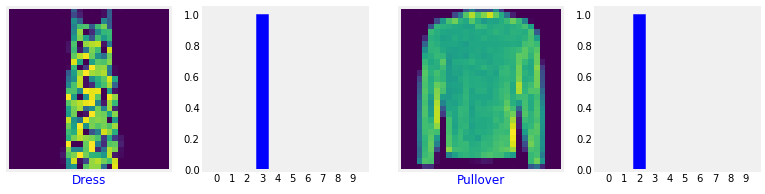

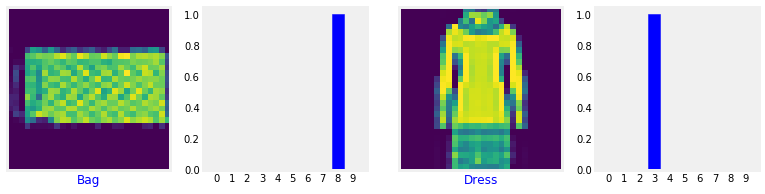

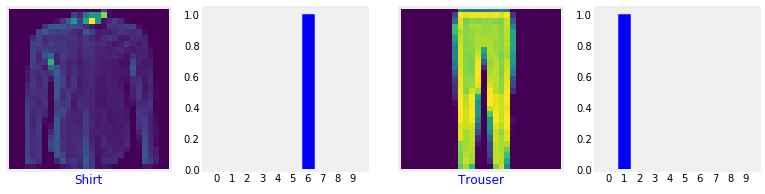

In [26]:
j=0
for i in range(100):
    plt.figure(figsize=(12,3))
    plt.subplot(1,4,1)
    plottingphoto(j)
    plt.subplot(1,4,2)
    plottingbargraph(j)
    j=j+1
    plt.subplot(1,4,3)
    plottingphoto(j)
    plt.subplot(1,4,4)
    plottingbargraph(j)
    j=j+1
    plt.show()